In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/dataset/hindi_data.csv'

In [ ]:
print(path)

/content/gdrive/MyDrive/dataset/hindi_data.csv


In [ ]:
import pandas as pd
url='/content/gdrive/MyDrive/dataset/hindi_data.csv'

In [ ]:
import os
import string
from string import digits
import matplotlib.pyplot as plt
%matplotlib inline
import re

import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model
import os, shutil
import pandas as pd

In [ ]:
dataset=pd.read_csv(url,names=['tweet','class'])

In [ ]:
dataset

,tweet,class
0,"वक्त, इन्सान और इंग्लैंड का मौसम आपको कभी भी ध...",NOT
1,#कांग्रेस के इस #कमीने की #करतूत को देखिए देश ...,HOF
2,पाकिस्तान को फेकना था फेका गया। जो हार कर भी द...,HOF
3,जो शब्द तूम आज किसी और औरत के लिए यूज कर रहे व...,NOT
4,नेता जी हम समाजवादी सिपाही हमेशा आपके साथ है आ...,NOT
...,...,...
1313,यह काला सूअर भी तो 10 जनपद का टॉयलेट साफ करने ...,HOF
1314,बेटा यह सवाल अपनी अम्मी से पूछना जवाब में असल...,HOF
1315,आप को तो पाकिस्तान मे होना चाहिए वहा जो यादव क...,HOF
1316,विजयमालिया ललितमोदी नीरवमोदी आसारामबापू बाबारा...,HOF


#Preprocessing

In [ ]:
dataset.dropna(subset = ["tweet"], inplace=True)

In [ ]:
dataset["class"].describe()

count     1318
unique       2
top        NOT
freq       713
Name: class, dtype: object

In [ ]:
pd.unique(dataset["class"])

array(['NOT', 'HOF'], dtype=object)

In [ ]:
dataset["class"]=dataset["class"].replace(to_replace =['HOF'], value ='yes')

In [ ]:
dataset["class"]=dataset["class"].replace(to_replace =['NOT'], value ='no')

In [ ]:
pd.unique(dataset["class"])

array(['no', 'yes'], dtype=object)

In [ ]:
dataset["class"].describe()

count     1318
unique       2
top         no
freq       713
Name: class, dtype: object

In [ ]:
# Adding text-length as a field in the dataset
dataset['text length'] = dataset['tweet'].apply(len)
print(dataset.head())

                                               tweet class  text length
0  वक्त, इन्सान और इंग्लैंड का मौसम आपको कभी भी ध...    no           79
1  #कांग्रेस के इस #कमीने की #करतूत को देखिए देश ...   yes          229
2  पाकिस्तान को फेकना था फेका गया। जो हार कर भी द...   yes          156
3  जो शब्द तूम आज किसी और औरत के लिए यूज कर रहे व...    no          265
4  नेता जी हम समाजवादी सिपाही हमेशा आपके साथ है आ...    no          244


#Visualization

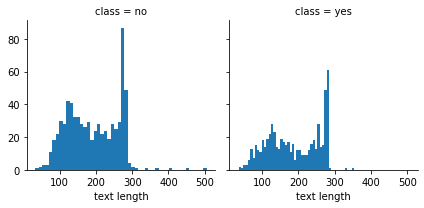

In [ ]:
#Basic visualization of data using histograms
# FacetGrid- Multi-plot grid for plotting conditional relationships
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=dataset, col='class')
graph.map(plt.hist, 'text length', bins=50)

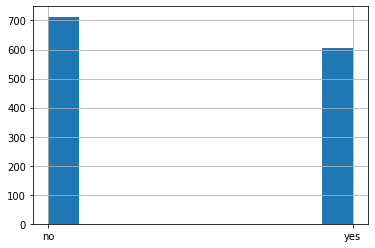

In [ ]:
dataset['class'].hist()

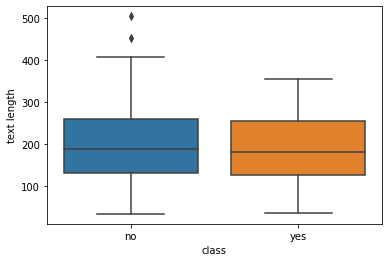

In [ ]:
# Box-plot visvualization
sns.boxplot(x='class', y='text length', data=dataset)

In [ ]:
dataset["class"]=dataset["class"].replace(to_replace =['no'], value =0)
dataset["class"]=dataset["class"].replace(to_replace =['yes'], value =1)

In [ ]:
train = dataset.iloc[:1000,:] 
test = dataset.iloc[1000:,:] 

In [ ]:
train[train['class'] == 0].head(10)

,tweet,class,text length
0,"वक्त, इन्सान और इंग्लैंड का मौसम आपको कभी भी ध...",0,79
3,जो शब्द तूम आज किसी और औरत के लिए यूज कर रहे व...,0,265
4,नेता जी हम समाजवादी सिपाही हमेशा आपके साथ है आ...,0,244
6,#कुत्ते भी हो रहे हैं #किडनी और #डायबटीज जैसी ...,0,83
9,कश्मीर मे सेना पर पत्थर मारने वाले और पत्थरबाज...,0,278
14,Pakode talna chalu kr do... mudra scheme se pa...,0,73
16,आदरणीय राष्ट्रीय अध्यक्ष जी से विनम्र निवेदन ह...,0,201
19,संत कबीर डिग्रीधारी नहीं थे लेकिन धार्मिक आडंब...,0,168
25,दिल बड़ा कर पगली बाते तो मेरे #कमीने DOST भी ब...,0,79
26,जिन्होंने उर्दू अख़बार वन्दे मातरम् के 1931 एड...,0,279


In [ ]:
train[train['class'] == 1].head(10)

,tweet,class,text length
1,#कांग्रेस के इस #कमीने की #करतूत को देखिए देश ...,1,229
2,पाकिस्तान को फेकना था फेका गया। जो हार कर भी द...,1,156
5,@narendramodi @AmitShah @BJP4India @BharatKaPM...,1,234
7,VIVAHIT BaitION KO BHI Patrick KIRSI BHOOMI MA...,1,187
8,10 एजेंसियों को किसी भी कंप्यूटर की निगरानी और...,1,258
10,"झोंपड़ी के, कुछ दिन पहले तक तो तू उस आदतन 'बाइ...",1,198
11,अभी सूअर 6 महीने में दिल्ली में विधानसभा चुनाव...,1,280
12,कुछ कमीने #नीच ग्रह में पैदा होते है और वो पैद...,1,243
13,भाई जैसे दिल्ली मे चुनाव आएगा हिन्दू-मुस्लिम क...,1,277
15,बेटा धोनी के बारे में कुछ बुरा बोले ना तो क्र...,1,81


In [ ]:
train.shape, test.shape

((1000, 3), (318, 3))

In [ ]:
train["class"].value_counts()

0    530
1    470
Name: class, dtype: int64

In [ ]:
combi = train.append(test, ignore_index=True, sort=True)
combi.shape

(1318, 3)

In [ ]:
tweet=dataset.tweet

#Remove special characters and digits

In [ ]:
dataset['tweet']=dataset['tweet'].apply(lambda x: x.lower())
dataset['tweet']=dataset['tweet'].apply(lambda x: re.sub("'", '', x))
exclude = set(string.punctuation)
dataset['tweet']=dataset['tweet'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
remove_digits = str.maketrans('', '', digits)
dataset['tweet']=dataset['tweet'].apply(lambda x: x.translate(remove_digits))
dataset['tweet'] = dataset['tweet'].apply(lambda x: re.sub("[२३०८१५७९४६]", "", x))
dataset['tweet']=dataset['tweet'].apply(lambda x: x.strip())
dataset['tweet']=dataset['tweet'].apply(lambda x: re.sub(" +", " ", x))
dataset.head()

,tweet,class,text length
0,वक्त इन्सान और इंग्लैंड का मौसम आपको कभी भी धो...,0,79
1,कांग्रेस के इस कमीने की करतूत को देखिए देश की ...,1,229
2,पाकिस्तान को फेकना था फेका गया। जो हार कर भी द...,1,156
3,जो शब्द तूम आज किसी और औरत के लिए यूज कर रहे व...,0,265
4,नेता जी हम समाजवादी सिपाही हमेशा आपके साथ है आ...,0,244


In [ ]:
all_hindi_words=set()
for hin in dataset['tweet']:
    for word in hin.split():
        if word not in all_hindi_words:
            all_hindi_words.add(word)

In [ ]:
len(all_hindi_words)

10101

#Tokenization

In [ ]:
tokenized_tweet = dataset['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [वक्त, इन्सान, और, इंग्लैंड, का, मौसम, आपको, क...
1    [कांग्रेस, के, इस, कमीने, की, करतूत, को, देखिए...
2    [पाकिस्तान, को, फेकना, था, फेका, गया।, जो, हार...
3    [जो, शब्द, तूम, आज, किसी, और, औरत, के, लिए, यू...
4    [नेता, जी, हम, समाजवादी, सिपाही, हमेशा, आपके, ...
Name: tweet, dtype: object

#Stemming

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet

0       [वक्त, इन्सान, और, इंग्लैंड, का, मौसम, आपको, क...
1       [कांग्रेस, के, इस, कमीने, की, करतूत, को, देखिए...
2       [पाकिस्तान, को, फेकना, था, फेका, गया।, जो, हार...
3       [जो, शब्द, तूम, आज, किसी, और, औरत, के, लिए, यू...
4       [नेता, जी, हम, समाजवादी, सिपाही, हमेशा, आपके, ...
                              ...                        
1313    [यह, काला, सूअर, भी, तो, जनपद, का, टॉयलेट, साफ...
1314    [बेटा, यह, सवाल, अपनी, अम्मी, से, पूछना, जवाब,...
1315    [आप, को, तो, पाकिस्तान, मे, होना, चाहिए, वहा, ...
1316    [विजयमालिया, ललितमोदी, नीरवमोदी, आसारामबापू, ब...
1317    [अप्रतिम, अद्वत, असाधारण, पराक्रम, से, भारत, क...
Name: tweet, Length: 1318, dtype: object

In [ ]:
import numpy as np
print(np.array(tokenized_tweet)) 

[list(['वक्त', 'इन्सान', 'और', 'इंग्लैंड', 'का', 'मौसम', 'आपको', 'कभी', 'भी', 'धोखा', 'दे', 'सकता', 'है।', 'indiavspakistan'])
 list(['कांग्रेस', 'के', 'इस', 'कमीने', 'की', 'करतूत', 'को', 'देखिए', 'देश', 'की', 'रक्षा', 'करते', 'शहीद', 'हुए', 'मां', 'भारती', 'के', 'सपूतों', 'का', 'ख्याल', 'भी', 'नहीं', 'रखा', 'दुश्मन', 'से', 'गले', 'मिल', 'गये', 'शर्मनाक', 'ये', 'पूरे', 'शहीद', 'का', 'अपमान', 'किया', 'है।', 'मैं', 'बहुत', 'कद्र', 'करते', 'थे', 'सिंधु', 'को', 'लेकिन', 'ये', 'तो', 'नकारा', 'है।'])
 list(['पाकिस्तान', 'को', 'फेकना', 'था', 'फेका', 'गया।', 'जो', 'हार', 'कर', 'भी', 'दुश्मन', 'को', 'हरा', 'दे', 'उसी', 'को', 'हमने', 'नाम', 'दिया।', 'bcci', 'ये', 'तुम्हारे', 'समझ', 'के', 'बाहर', 'हैं', 'तुम', 'बॉलीवुड', 'में', 'रंडी', 'रोओ', 'इधर', 'मत', 'घुसो।'])
 ...
 list(['आप', 'को', 'तो', 'पाकिस्तान', 'मे', 'होना', 'चाहिए', 'वहा', 'जो', 'यादव', 'की', 'महिलाए', 'कोठे', 'पर', 'सालो', 'से', 'दर', 'पिड़ी', 'जबर्दस्ती', 'बठाई', 'जाती', 'है', 'पाकिस्तान', 'के', 'माधरचोद', 'यादव', 'हिजड़े', 'होते'

In [ ]:
print("maximum length of Hindi Sentence ",max(dataset['tweet']))

maximum length of Hindi Sentence  •drrpnishank जी से भेंट कर उन्हें बधाई दी और अपने क्षेत्र में नए सेंट्रल स्कूल खोलने पर चर्चा कीदेश के hrdमंत्री श्री निशंक जी ने खुले दिल से समर्थन दिया और कहा narendramodi जी के कार्याकाल में शिक्षा से कोई वंचित नहीं रहेगा बहुत आभारनॉर्थ ईस्ट दिल्ली की जनता को समर्पित


In [ ]:
print("maximum length of Hindi Sentence ",max(dataset['text length']))

maximum length of Hindi Sentence  505


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)
bow = bow_vectorizer.fit_transform(dataset['tweet'])
bow.shape

(1318, 1000)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(dataset['tweet'])
tfidf.shape

(1318, 1000)

#Word2Vec VECTOR CONVERSION

In [ ]:
from gensim.models.word2vec import Word2Vec
model_w2v = Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(tokenized_tweet), epochs=20)

(639128, 920440)

In [ ]:
model_w2v.wv.most_similar(positive="इन्सान")

[('करले', 0.9413659572601318),
 ('कराना', 0.9368174076080322),
 ('बादशाह', 0.935349702835083),
 ('सत्तावन', 0.9347618818283081),
 ('प्रतिक्रिया', 0.9339395761489868),
 ('जलाने', 0.933341383934021),
 ('articl', 0.9328415393829346),
 ('विडंबना', 0.9325646758079529),
 ('बुखारी', 0.9301993250846863),
 ('जे', 0.9299325346946716)]

In [ ]:
model_w2v['इन्सान']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.01807923, -0.07690064, -0.07121973,  0.05852332,  0.04508375,
        0.19990374, -0.16565862,  0.20424281,  0.00776256, -0.10731898,
       -0.0634286 ,  0.0579996 , -0.14408113, -0.02427118, -0.11368673,
       -0.03627405, -0.06231578, -0.15344627,  0.03814966, -0.13913494,
        0.02881295, -0.0052234 ,  0.01340609,  0.32654488,  0.10202617,
       -0.00251494, -0.00711411,  0.14493373,  0.01739144,  0.07042199,
        0.10565399, -0.02725179, -0.02213104, -0.02541417, -0.07863902,
        0.05294947,  0.14065126,  0.03507749, -0.12703376,  0.13527939,
       -0.20226146, -0.25411627,  0.00761436, -0.07246399, -0.02680191,
       -0.02566341,  0.03188893, -0.07418466, -0.12912904,  0.18499902,
       -0.02467237, -0.04472859, -0.06310274,  0.04120259, -0.00768384,
       -0.05557574,  0.0647141 ,  0.01650552, -0.04909573, -0.06918275,
       -0.03664113, -0.04728643, -0.04653442,  0.0104848 , -0.01221819,
        0.1621578 , -0.1156904 ,  0.12343574,  0.04099977,  0.12

In [ ]:
semantically_similar_words = {words: [item[0] for item in model_w2v.wv.most_similar([words], topn=4)]
                  for words in ['बुरा', 'कसम', 'तोड़', 'पाकिस्तान', 'काला']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

बुरा:['ज़माने', 'हिंदुस्तानी', 'ढूंढ', 'चलेगा']
कसम:['खुदा', 'शक्ल', 'मुझको', 'चश्मा']
तोड़:['फोड़', 'मन्दिर', 'पत्थर', 'विधवा']
पाकिस्तान:['नाबालिग', 'पार', 'बराबर', 'पत्थरबाजी']
काला:['रचा', 'emerg', 'सिखाया', 'उम्मीदवार']


In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
import numpy as np
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
  wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(1318, 200)

In [ ]:
wordvec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.039952,-0.079004,-0.037546,0.168024,0.055608,0.221515,-0.185732,0.192577,0.076227,-0.039084,-0.084647,-0.056352,-0.122316,0.028821,-0.160290,-0.058172,-0.051985,-0.083006,-0.009761,-0.102441,-0.016707,-0.059600,-0.026638,0.271364,0.137134,0.049682,0.073197,0.115378,-0.037352,0.001977,0.013817,-0.048399,-0.048361,-0.047336,-0.119347,0.011865,0.058557,0.025554,-0.138784,0.123619,...,0.073303,0.181423,0.053779,0.037929,0.063419,0.003960,0.034809,-0.025757,-0.002376,0.044208,0.128167,-0.067176,0.239510,0.052231,-0.079391,0.031596,-0.183449,0.060406,-0.090189,0.140444,0.126455,0.082569,0.097037,-0.088066,-0.030928,-0.148685,-0.047827,-0.084426,-0.206614,0.016843,0.178210,-0.215169,-0.131880,-0.291045,0.158847,-0.209526,0.111611,-0.032685,-0.061793,0.205131
1,-0.061662,-0.018048,-0.040346,0.084357,0.059220,0.213927,-0.172788,0.151173,0.064877,-0.023819,-0.095527,-0.012046,-0.076238,0.000214,-0.175601,-0.051068,-0.075085,-0.064731,-0.007208,-0.087888,0.043050,0.069275,0.031663,0.307860,0.048358,0.005631,0.089484,0.110972,-0.045918,0.011792,0.013745,0.042509,-0.070641,-0.047744,-0.140660,0.085892,0.042883,-0.017926,-0.096970,0.013338,...,0.004994,0.200029,0.032639,0.065147,0.075184,-0.040659,0.110846,0.010276,-0.035831,0.008434,0.110532,-0.070661,0.248299,0.087249,-0.052772,0.172885,-0.266332,0.058155,-0.024899,0.079771,0.130889,0.015936,0.035125,-0.067223,-0.029323,-0.198783,-0.059136,-0.107785,-0.119361,0.009978,0.143472,-0.131323,-0.026413,-0.108598,0.083382,-0.196520,0.046196,0.066596,0.007783,0.230782
2,-0.037037,-0.038938,0.021536,0.146989,0.101025,0.229479,-0.097116,0.188298,0.026090,-0.094343,-0.147734,0.021655,-0.088338,0.005571,-0.096966,-0.023163,-0.073632,-0.014298,0.076624,-0.099074,0.078025,0.059856,0.024286,0.325379,0.111538,-0.060420,0.054317,0.126725,-0.110381,0.040359,0.064711,0.044763,-0.090555,-0.027469,-0.080661,0.028652,0.103226,0.022570,-0.141060,0.039162,...,-0.007424,0.198784,0.061875,0.082445,0.059650,0.019879,0.084339,-0.010081,0.038101,0.047220,0.106456,-0.042381,0.230622,0.094790,-0.066524,0.178342,-0.243716,0.076578,-0.061971,0.122871,0.185510,0.001875,0.092705,-0.042592,-0.043257,-0.231194,-0.007659,-0.118295,-0.203020,0.061138,0.105198,-0.132178,-0.007996,-0.217221,0.152443,-0.169987,0.037271,0.033238,0.045056,0.177810
3,0.033931,-0.034729,0.035315,0.050500,0.092864,0.185736,-0.077253,0.165076,0.026300,-0.126292,-0.138630,-0.012467,-0.145546,0.016385,-0.089915,-0.042152,0.008351,0.002391,0.077774,-0.128711,0.102897,-0.039875,0.027897,0.369346,0.083838,-0.045929,0.008049,0.161197,-0.062765,0.028737,0.024928,0.047388,-0.070597,-0.071262,-0.103112,0.025618,0.151055,0.056396,-0.144463,0.053011,...,0.027166,0.139944,0.054649,0.063464,0.029792,0.003371,0.032570,0.012409,0.045805,0.112634,0.074577,-0.051525,0.319333,0.084770,-0.109932,0.145159,-0.179075,0.076843,-0.047292,0.142623,0.137776,0.022686,0.118902,-0.015736,-0.016071,-0.201919,-0.018168,-0.161184,-0.181493,0.005605,0.146560,-0.078395,-0.071575,-0.196579,0.120415,-0.132227,0.073814,0.057236,0.025910,0.197016
4,0.074318,-0.114403,0.057290,0.021747,0.088419,0.185113,-0.109413,0.172972,0.029255,-0.011605,-0.062128,0.010210,-0.129410,0.026866,-0.176150,-0.040590,-0.104328,0.016344,0.032885,-0.043010,0.067433,-0.032110,-0.016984,0.383272,0.112370,0.035096,0.019448,0.194856,0.005239,0.087443,0.075291,-0.040312,-0.004212,-0.075516,-0.106218,0.046460,0.141836,0.008467,-0.130126,0.078146,...,0.028389,0.203752,0.013601,0.045189,0.114005,0.036127,0.076148,-0.041540,-0.006548,0.035943,0.047627,-0.073605,0.297983,0.114112,-0.045794,0.073813,-0.154568,0.097754,-0.019227,0.105207,0.099205,-0.068980,0.130232,-0.038812,-0.072870,-0.140759,0.008659,-0.136186,-0.156937,0.103745,0.124622,-0.16099

#Fasttext Vector Conversion

In [ ]:
pip install fastText

     |████████████████████████████████| 68 kB 3.3 MB/s 
  Using cached pybind11-2.7.0-py2.py3-none-any.whl (199 kB)
  Created wheel for fastText: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3093533 sha256=2910ef932a953924adf90c021d1f4b4e20c68cdca187cb5e49b8dd05fbea2d16
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fastText


In [ ]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2

In [ ]:
from gensim.models.fasttext import FastText
ft_model = FastText(tokenized_tweet,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

In [ ]:
print(ft_model.wv['बेटा धोनी के बारे में कुछ बुरा बोले ना तो  क्रिकेट की कसम तुमारी गांड तोड़ देंगे'])

[-0.17159644  0.03175003  0.0599951   0.34252837 -0.13873287 -0.5620301
  0.07740642 -0.5507802  -0.07572628 -0.12549134 -0.5142197   0.40350175
  0.13465223  0.07387622 -0.60802716 -0.52292854  0.13025995  0.09105202
 -0.3862038   0.4340768  -0.06978016  0.23362039 -0.4379673   0.02683445
  0.25912505 -0.12967132 -0.40982625 -0.2929204   0.06684594  0.20967248
  0.34074956 -0.19728397  0.9018847   0.3090386   0.38382486  0.25535172
 -0.2574884  -0.33378503  0.03430269 -0.3421931   0.06771199  0.3494286
  0.0445867   0.2496289   0.00298356  0.08932813  0.61518955 -0.50388974
 -0.02932963 -0.5880194   0.28760812  0.47769055 -0.3151773  -0.90694463
 -0.4519198   0.00714432  0.64705515 -0.4461562  -0.40359092  0.11656582]


In [ ]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=5)]
                  for words in ['पाकिस्तान','करतूत','धोखा','बुरा', 'कसम']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

पाकिस्तान:['नमक', 'चले', 'पार', 'अपनाने', 'भारत']
करतूत:['करती', 'से', 'करते', 'भगवान', 'प्रदान']
धोखा:['खा', 'रखा', 'दिखा', 'बीवी', 'लिखा']
बुरा:['बोले', 'अतीक', 'साबित', 'मिला', 'दल']
कसम:['खून', 'भगवा', 'हिन्दुओं', 'बताएं', 'हो।']


#Doc2Vec Vector Conversion

In [ ]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

from gensim.models.doc2vec import Doc2Vec

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


In [ ]:
labeled_tweets[:6]

[LabeledSentence(words=['वक्त', 'इन्सान', 'और', 'इंग्लैंड', 'का', 'मौसम', 'आपको', 'कभी', 'भी', 'धोखा', 'दे', 'सकता', 'है।', 'indiavspakistan'], tags=['tweet_0']),
 LabeledSentence(words=['कांग्रेस', 'के', 'इस', 'कमीने', 'की', 'करतूत', 'को', 'देखिए', 'देश', 'की', 'रक्षा', 'करते', 'शहीद', 'हुए', 'मां', 'भारती', 'के', 'सपूतों', 'का', 'ख्याल', 'भी', 'नहीं', 'रखा', 'दुश्मन', 'से', 'गले', 'मिल', 'गये', 'शर्मनाक', 'ये', 'पूरे', 'शहीद', 'का', 'अपमान', 'किया', 'है।', 'मैं', 'बहुत', 'कद्र', 'करते', 'थे', 'सिंधु', 'को', 'लेकिन', 'ये', 'तो', 'नकारा', 'है।'], tags=['tweet_1']),
 LabeledSentence(words=['पाकिस्तान', 'को', 'फेकना', 'था', 'फेका', 'गया।', 'जो', 'हार', 'कर', 'भी', 'दुश्मन', 'को', 'हरा', 'दे', 'उसी', 'को', 'हमने', 'नाम', 'दिया।', 'bcci', 'ये', 'तुम्हारे', 'समझ', 'के', 'बाहर', 'हैं', 'तुम', 'बॉलीवुड', 'में', 'रंडी', 'रोओ', 'इधर', 'मत', 'घुसो।'], tags=['tweet_2']),
 LabeledSentence(words=['जो', 'शब्द', 'तूम', 'आज', 'किसी', 'और', 'औरत', 'के', 'लिए', 'यूज', 'कर', 'रहे', 'वो', 'बचाकर', 'रखना',

In [ ]:
model_d2v = Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm_mean = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 5.                                  
                                  workers=32, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23, # for reproducibility
                                 ) 

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples= len(tokenized_tweet), epochs=15)

100%|██████████| 1318/1318 [00:00<00:00, 937918.68it/s]


In [ ]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(1318, 200)

In [ ]:
docvec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.114126,-0.161617,0.034409,-0.154707,0.112289,0.094823,-0.018980,0.075990,-0.179662,0.129586,-0.084008,-0.105695,-0.180839,-0.001812,0.050326,-0.076046,-0.052406,0.182377,0.227368,-0.229505,-0.041888,0.062399,-0.081050,-0.027491,-0.040619,-0.149097,0.060448,-0.219345,-0.012273,0.095200,0.035125,-0.024813,0.039458,0.036444,0.068856,-0.009518,-0.206214,0.070108,-0.012437,-0.086732,...,-0.091821,-0.039494,0.097734,0.037690,-0.065714,-0.142045,0.046945,0.094175,-0.002525,-0.017162,0.091101,0.096781,-0.040719,0.124409,-0.122944,0.215672,-0.061216,0.025450,-0.019072,-0.076230,0.084250,0.080966,0.206649,0.044706,0.084399,0.129446,0.092357,-0.191427,0.084637,0.182726,0.075693,0.047591,0.091931,0.173551,-0.162244,-0.171648,0.133945,-0.275458,0.234702,-0.066222
1,0.004738,-0.014192,0.008441,-0.021736,0.019794,-0.003829,0.011036,0.168498,-0.128557,0.070773,-0.116740,0.090700,0.067916,-0.119242,0.226419,-0.108777,-0.030281,0.310661,0.091239,-0.321626,0.296180,0.227138,-0.233617,0.187386,-0.006959,-0.100225,-0.144304,-0.114591,-0.048070,0.104982,0.078096,-0.012175,-0.056328,-0.130228,0.213930,-0.208448,-0.062486,0.405026,-0.034377,-0.261687,...,-0.024338,-0.004618,0.074887,0.107787,0.083143,-0.168437,0.179885,-0.360925,0.093245,-0.201882,0.176562,0.052506,0.008854,0.134847,-0.253352,0.068563,0.115148,-0.020286,-0.124975,-0.029514,0.084240,0.032739,0.401446,-0.026510,0.087614,0.080003,0.129790,-0.006837,0.017624,0.164047,0.031109,0.013311,0.215067,0.078740,-0.230153,-0.175408,0.014834,-0.177674,0.152768,-0.164687
2,-0.037562,-0.112645,0.117517,-0.080775,0.061061,0.108576,0.050480,0.007489,-0.075205,0.224825,-0.036372,-0.024524,0.010410,0.046925,0.004854,-0.049504,-0.032409,0.016572,-0.020678,-0.076527,-0.049783,0.074376,-0.006992,-0.152809,0.003668,-0.124042,0.130382,-0.014338,-0.042797,0.229829,-0.143417,0.079018,-0.006467,-0.045123,0.049356,0.009443,-0.085471,0.025779,0.031774,0.112410,...,-0.024590,-0.105635,-0.018469,0.066314,0.047494,0.059466,0.086754,0.203768,0.111314,0.174730,-0.006508,0.054657,0.156754,0.160662,-0.001237,0.054067,-0.009210,-0.034649,-0.120672,0.154057,0.085925,0.137734,-0.099035,0.158031,0.160333,0.000278,-0.003698,-0.153581,0.251371,0.000284,0.087554,-0.105040,0.024188,0.004418,0.050863,-0.036503,0.288897,-0.199621,-0.057713,0.015838
3,-0.165624,-0.215008,-0.014793,-0.245215,0.080711,0.108802,0.125793,-0.190343,-0.032696,0.519883,-0.054950,-0.110870,-0.171068,-0.139156,0.014817,-0.101274,-0.061482,0.236662,0.261171,-0.221583,0.145398,0.019362,-0.076092,0.043957,-0.059844,-0.375949,0.110671,0.004913,-0.195625,0.168039,-0.003592,0.247441,-0.115617,-0.293988,0.147039,-0.263905,-0.102280,0.348719,-0.037675,-0.033855,...,-0.007889,0.047694,0.062008,-0.193267,0.184172,0.078342,0.057729,0.056941,0.219654,0.132793,-0.090155,-0.054144,0.206322,0.188011,-0.293567,0.090476,-0.038211,0.068300,-0.143126,-0.249574,0.181466,0.078499,0.051753,0.252201,0.221352,-0.195779,0.256376,-0.103746,0.557381,0.211165,0.221074,-0.140865,0.203456,0.284532,0.179045,-0.167754,0.458136,-0.082915,-0.156040,0.071713
4,-0.216950,-0.323940,-0.000154,-0.392014,0.292059,0.211110,0.246033,-0.090255,-0.226754,-0.067360,-0.199563,-0.314035,-0.369474,0.071355,0.175055,-0.046768,-0.008095,0.321403,0.293390,-0.241614,0.040785,-0.280760,-0.124615,-0.021261,-0.114909,-0.209528,-0.084920,-0.503868,0.265887,-0.247841,0.173360,-0.105414,0.086486,-0.024426,0.026345,0.139206,-0.289803,0.016083,0.101769,-0.107297,...,-0.060234,0.032132,0.245303,0.090029,-0.199256,-0.396087,-0.284761,0.287432,-0.123547,-0.050199,0.227530,0.211128,-0.214216,-0.019595,-0.071204,0.395715,-0.219077,0.097860,0.112708,-0.091730,0.021958,0.077064,0.460642,-0.158351,-0.154208,0.037833,0.118871,-0.242107,-0.013767,0.15

#Splitting Data Into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix, accuracy_score

**Bow**

In [ ]:
# Extracting train and test BoW features 
train_bow = bow[:1000,:] 
test_bow = bow[1000:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['class'], random_state=42, test_size=0.2)

**TFIDF**

In [ ]:
train_tfidf = tfidf[:1000,:]
test_tfidf = tfidf[1000:,:] 

# splitting data into training and validation set 
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, train['class'], random_state=42, test_size=0.2)

**Word2Vec**

In [ ]:
train_w2v = wordvec_df.iloc[:1000,:]
test_w2v = wordvec_df.iloc[1000:,:]

# splitting data into training and validation set 
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, train['class'], random_state=42, test_size=0.2)

**Doc2vec**

In [ ]:
train_d2v = docvec_df.iloc[:1000,:-1]
test_d2v = docvec_df.iloc[1000:,:-1] 

# splitting data into training and validation set 
xtrain_d2v, xvalid_d2v, ytrain, yvalid = train_test_split(train_d2v, train['class'], random_state=42, test_size=0.2)


**Fastext**

#Model Implementation




#Word2vec

**1. SVM-RBF**

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='rbf').fit(xtrain_w2v, ytrain) 
prediction = svc.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM-RBF(word2vec), Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.79      0.73      0.76       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200

SVM-RBF(word2vec), Accuracy Score: 0.77


**Hyper Parameter tuning using Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1,10,100], 'kernel': ['linear','rbf']}]
grid_search = GridSearchCV(estimator= svc,
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(xtrain_w2v, ytrain)
print(grid_search.best_params_)
prediction = grid_search.predict(xvalid_w2v)  

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM(word2vec) after HT+GD, Accuracy Score:",acc1)

{'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       100
           1       0.78      0.75      0.77       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200

SVM(word2vec) after HT+GD, Accuracy Score: 0.77


**Accuracy and Confusion Matrix**

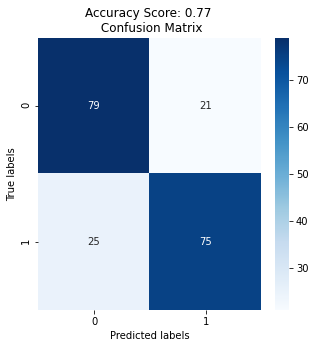

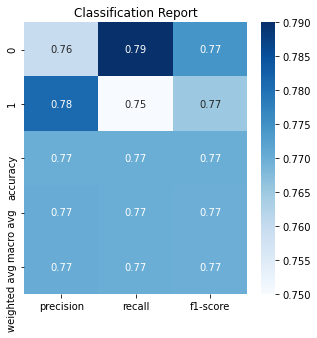

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**Hyper Parameter Tuning using Random Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
svc = svm.SVC()

# Create the random grid
random_grid = {'C': [1,10,100], 
              'kernel': ['linear','rbf']}
              
rf_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_w2v, ytrain)
print(rf_random.best_params_)
prediction = rf_random.predict(xvalid_w2v) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM(word2vec) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.5s finished


{'kernel': 'rbf', 'C': 1}
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.79      0.73      0.76       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200

SVM(word2vec) after HT+RS, Accuracy Score: 0.77


**Accuracy and Confusion Matrix**

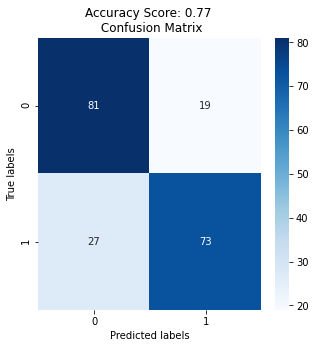

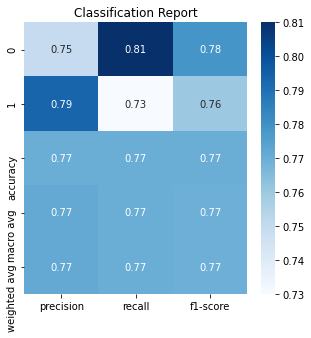

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score =rf_random.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**2.Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v)


#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(word2vec), Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       100
           1       0.77      0.72      0.75       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200

RF(word2vec), Accuracy Score: 0.755


**Hyper Parameter Tuning using Random Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_w2v, ytrain)

print("best Params")
print(rf_random.best_params_)

prediction = rf_random.predict(xvalid_w2v)

#classifiction Report
report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(word2vec) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.0min finished


best Params
{'n_estimators': 525, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 36, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       100
           1       0.77      0.75      0.76       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200

RF(word2vec) after HT+RS, Accuracy Score: 0.765


**Accuracy and Confusion Matrix**

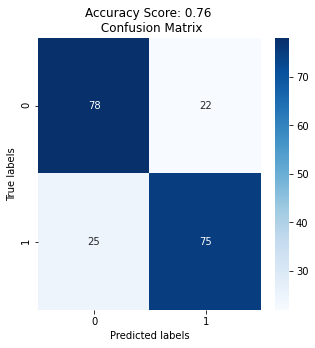

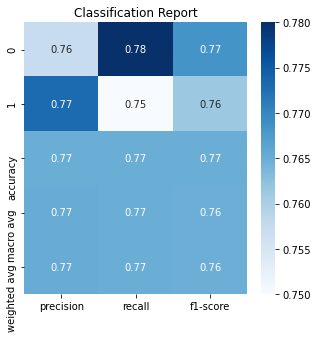

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**Hyper Parameter tuning using Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(xtrain_w2v, ytrain)

print("best Params")
print(grid_search.best_params_)

prediction = grid_search.predict(xvalid_w2v)

#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(word2vec) after HT+GS, Accuracy Score:",acc1)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 10.6min finished


best Params
{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       100
           1       0.77      0.72      0.74       100

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

RF(word2vec) after HT+GS, Accuracy Score: 0.75


**Accuray and Confusion Matrix**

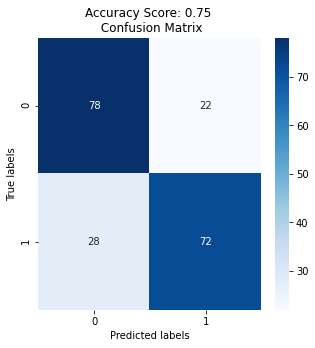

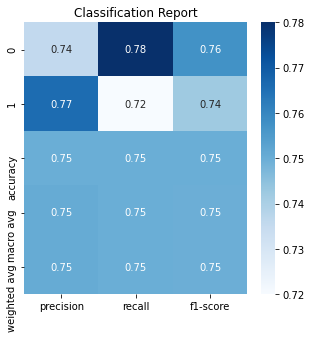

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**3.LSTM**

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Flatten
from keras.models import Sequential
model = Sequential()
model.add(Embedding(200, 50, input_length = xtrain_w2v.shape[1]))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 50)           10000     
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 70,501
Trainable params: 70,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size=32
model.fit(xtrain_w2v, ytrain, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
25/25 [==============================] - 35s 340ms/step - loss: 0.0000e+00 - accuracy: 0.4687
Epoch 2/5
25/25 [==============================] - 8s 334ms/step - loss: 0.0000e+00 - accuracy: 0.4527
Epoch 3/5
25/25 [==============================] - 8s 337ms/step - loss: 0.0000e+00 - accuracy: 0.4701
Epoch 4/5
25/25 [==============================] - 8s 337ms/step - loss: 0.0000e+00 - accuracy: 0.4622
Epoch 5/5
25/25 [==============================] - 8s 334ms/step - loss: 0.0000e+00 - accuracy: 0.4719


In [ ]:
prediction = model.predict(xvalid_w2v)

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("LSTM(word2vec), Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.50      1.00      0.67       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200

LSTM(word2vec), Accuracy Score: 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def build_model(var_activation='relu',var_optimizer='adam'):
  model = Sequential()
  model.add(Embedding(300, 150, input_length = xtrain_w2v.shape[1]))
  model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
  model.add(Flatten())
  model.add(Dense(60,activation=var_activation))
  model.add(Dense(5,activation=var_activation))
  model.add(Dense(1,activation='softmax'))
  model.compile(loss="binary_crossentropy",
                optimizer=var_optimizer,
                metrics=["accuracy"])
  return model
model_default = build_model()
model_default.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 150)          45000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               100400    
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 305       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 151,771
Trainable params: 151,771
Non-trainable params: 0
________________________________________________

In [ ]:
_activations=['tanh','relu','selu']
_optimizers=['sgd','adam']
_batch_size=[16,32,64]
params=dict(var_activation=_activations,
            var_optimizer=_optimizers,
            batch_size=_batch_size)
print(params)

{'var_activation': ['tanh', 'relu', 'selu'], 'var_optimizer': ['sgd', 'adam'], 'batch_size': [16, 32, 64]}


In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=build_model,epochs=4,batch_size=16)
np.random.seed(42)

In [ ]:
rscv = RandomizedSearchCV(model, param_distributions=params, cv=3, n_iter=10)
rscv_results = rscv.fit(xtrain_w2v,ytrain)
print('Best score is: {} using {}'.format(rscv_results.best_score_,
rscv_results.best_params_))

Epoch 1/4
34/34 [==============================] - 19s 407ms/step - loss: 0.6942 - accuracy: 0.4423
Epoch 2/4
34/34 [==============================] - 14s 404ms/step - loss: 0.6895 - accuracy: 0.4523
Epoch 3/4
34/34 [==============================] - 14s 405ms/step - loss: 0.6870 - accuracy: 0.4394
Epoch 4/4
17/17 [==============================] - 2s 54ms/step - loss: 0.6968 - accuracy: 0.4944
Epoch 1/4
34/34 [==============================] - 19s 413ms/step - loss: 0.6909 - accuracy: 0.4616
Epoch 2/4
34/34 [==============================] - 14s 409ms/step - loss: 0.6927 - accuracy: 0.4759
Epoch 3/4
34/34 [==============================] - 14s 420ms/step - loss: 0.6925 - accuracy: 0.4723
Epoch 4/4
17/17 [==============================] - 2s 54ms/step - loss: 0.6906 - accuracy: 0.4644
Epoch 1/4
34/34 [==============================] - 19s 407ms/step - loss: 0.6935 - accuracy: 0.4465
Epoch 2/4
34/34 [==============================] - 14s 408ms/step - loss: 0.6946 - accuracy: 0.4903
Epoc

In [ ]:
prediction = rscv_results.predict(xvalid_w2v)

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("LSTM(word2vec), Accuracy Score:",acc1)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.50      1.00      0.67       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200

LSTM(word2vec), Accuracy Score: 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13/13 [==============================] - 2s 54ms/step - loss: 0.6959 - accuracy: 0.5000


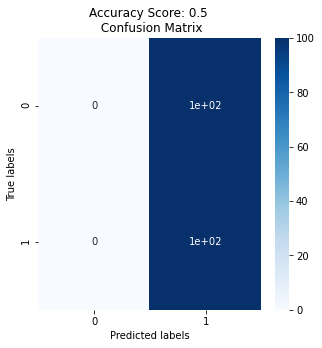

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


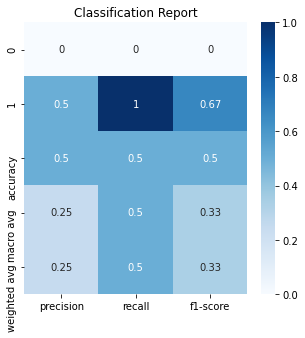

In [ ]:
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rscv_results.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**Doc2vec lstm**

In [ ]:
model = Sequential()
model.add(Embedding(500, 120, input_length = xtrain_d2v.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())
batch_size=32
#model.fit(xtrain_d2v, ytrain, epochs = 10, batch_size=batch_size, verbose = 'auto')

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 199, 120)          60000     
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 199, 120)          0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 176)               209088    
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 177       
Total params: 269,265
Trainable params: 269,265
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(xtrain_d2v, ytrain, epochs = 10, batch_size=batch_size, verbose = 'auto')

In [ ]:
model_default = build_model()
_activations=['tanh','relu','selu']
_optimizers=['sgd','adam']
_batch_size=[16,32,64]
params=dict(var_activation=_activations,
            var_optimizer=_optimizers,
            batch_size=_batch_size)
print(params)

model = KerasClassifier(build_fn=build_model,epochs=5,batch_size=16)
np.random.seed(42)
rscv = RandomizedSearchCV(model, param_distributions=params, cv=3, n_iter=6)
rscv_results = rscv.fit(xtrain_d2v,ytrain)
print('Best score is: {} using {}'.format(rscv_results.best_score_,
rscv_results.best_params_))

#Doc2vec

**1.SVM-RBF**

In [ ]:
svc = svm.SVC(kernel='rbf', C=1).fit(xtrain_d2v, ytrain) 
prediction = svc.predict(xvalid_d2v) 

#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM-RBF(doc2vec), Accuracy Score:",acc1)

**Hyper Parameter tuning using Grid Search**

In [ ]:
parameters = [{'C': [1,10,50,100], 'kernel': ['linear','rbf']}]
grid_search = GridSearchCV(estimator= svc,
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(xtrain_d2v, ytrain)
grid_search.best_params_
prediction = grid_search.predict(xvalid_d2v) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)


print("SVM_RBF(doc2vec) after HT+GS, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       100
           1       0.76      0.74      0.75       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200

SVM_RBF(doc2vec) after HT+GS, Accuracy Score: 0.755


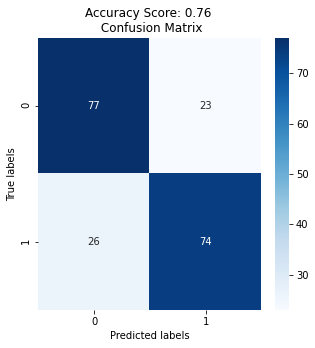

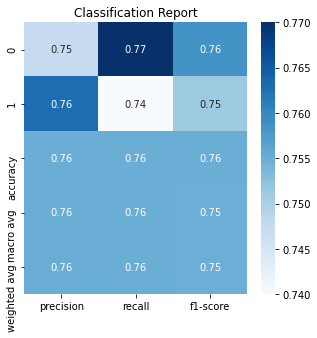

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_d2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**Hyper Parameter Tuning using Random Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#svc = svm.SVC()

# Create the random grid
random_grid = {'C': [0.1,1,10,100], 
              'kernel': ['linear','rbf']}
              
rf_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_d2v, ytrain)
print("best Params")
print(rf_random.best_params_)


prediction = rf_random.predict(xvalid_d2v) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)


print("SVM_RBF(doc2vec) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    3.7s finished


best Params
{'kernel': 'linear', 'C': 0.1}
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       100
           1       0.76      0.70      0.73       100

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

SVM_RBF(doc2vec) after HT+RS, Accuracy Score: 0.74


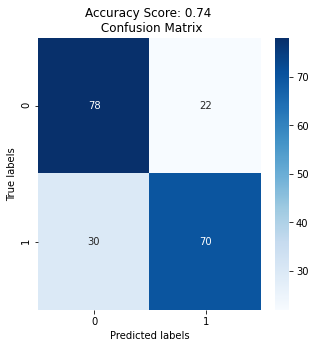

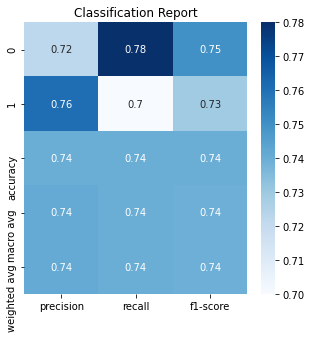

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_d2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**2.Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain) 
prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)
#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(doc2vec), Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       100
           1       0.71      0.69      0.70       100

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200

RF(doc2vec), Accuracy Score: 0.705


**Hyper Parametr using Random Search**

In [ ]:
rf = RandomForestClassifier()
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_d2v, ytrain)

print("best Params")
print(rf_random.best_params_)

prediction = rf_random.predict(xvalid_d2v)

#classifiction Report
report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(Doc2vec) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.3min finished


best Params
{'n_estimators': 954, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 18, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       100
           1       0.71      0.69      0.70       100

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200

RF(Doc2vec) after HT+RS, Accuracy Score: 0.705


**Accuracy and Confusion Matrix**

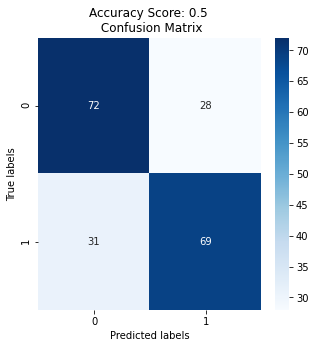

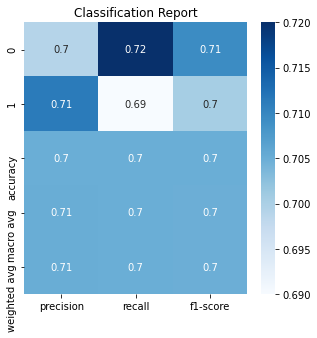

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**Hyper Parameter Tuning Using Grid Search**

In [ ]:
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 50, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(xtrain_d2v, ytrain)
print(grid_search.best_params_)
prediction = grid_search.predict(xvalid_d2v)

#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(doc2vec) after HT+GD, Accuracy Score:",acc1)

**Accuracy and Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_d2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**3. LSTM**

In [ ]:
model = Sequential()
model.add(Embedding(500, 120, input_length = xtrain_d2v.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())
batch_size=32
model.fit(xtrain_d2v, ytrain, epochs = 10, batch_size=batch_size, verbose = 'auto')

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_42 (Embedding)     (None, 200, 120)          60000     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 120)          0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 176)               209088    
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 177       
Total params: 269,265
Trainable params: 269,265
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
12/23 [==============>...............] - ETA: 9s - loss: 0.6954 - accuracy: 0.5063 

InvalidArgumentError: ignored

#BOW

**1. SVM-RBF** **bold text**

**Hyper Parameter Tuning using Grid Search**

In [ ]:
svc = svm.SVC()
parameters = [{'C': [1,10,50,100], 'kernel': ['linear','rbf']}]
grid_search = GridSearchCV(estimator= svc,
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(xtrain_bow, ytrain)
grid_search.best_params_
prediction = grid_search.predict(xvalid_bow) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)


print("SVM_RBF(BOW) after HT+GS, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        99
           1       0.75      0.56      0.64        81

    accuracy                           0.72       180
   macro avg       0.72      0.70      0.70       180
weighted avg       0.72      0.72      0.71       180

SVM_RBF(BOW) after HT+GS, Accuracy Score: 0.7166666666666667


**Accuracy or Confusion Matrix**

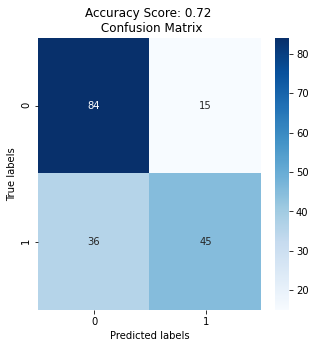

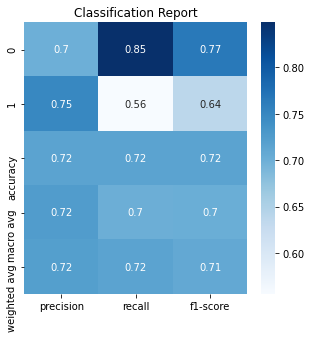

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_bow, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**Hyper Parameter Tuning using Random Search**

In [ ]:
svc = svm.SVC()

# Create the random grid
random_grid = {'C': [1,10,100], 
              'kernel': ['linear','rbf']}
              
rf_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_bow, ytrain)
print(rf_random.best_params_)
prediction = rf_random.predict(xvalid_bow) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM(bow) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'kernel': 'rbf', 'C': 1}
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        99
           1       0.75      0.56      0.64        81

    accuracy                           0.72       180
   macro avg       0.72      0.70      0.70       180
weighted avg       0.72      0.72      0.71       180

SVM(bow) after HT+RS, Accuracy Score: 0.7166666666666667


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.9s finished


**Accuracy or Confusion Matrix**

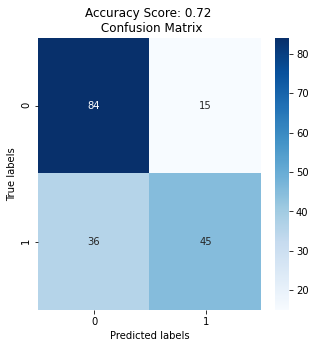

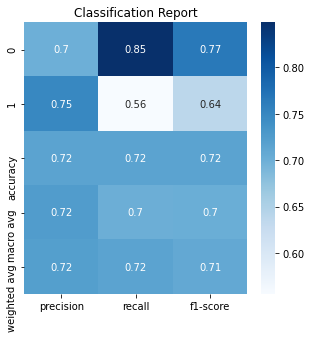

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_bow, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**2. Random Forest**

**Hyper Parameter using grid search**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 50, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(xtrain_bow, ytrain)
print(grid_search.best_params_)
prediction = grid_search.predict(xvalid_bow)

#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(Bow) after HT+GD, Accuracy Score:",acc1)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.8min


{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.59      0.96      0.73        99
           1       0.78      0.17      0.28        81

    accuracy                           0.61       180
   macro avg       0.68      0.57      0.51       180
weighted avg       0.67      0.61      0.53       180

RF(Bow) after HT+GD, Accuracy Score: 0.6055555555555555


[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.5min finished


**Accuracy and Confusion Matrix**

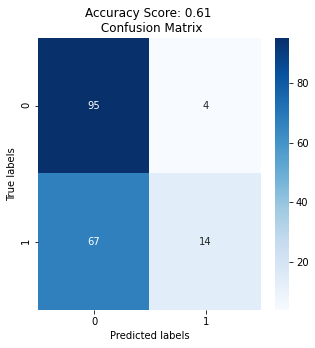

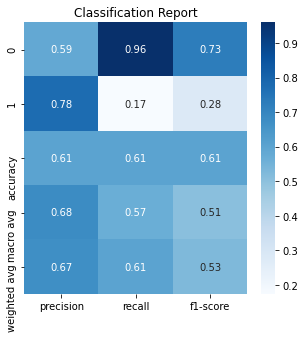

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_bow, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**Hyper Parameter Tuning using Random Search**

In [ ]:
rf = RandomForestClassifier()
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_bow, ytrain)

print("best Params")
print(rf_random.best_params_)

prediction = rf_random.predict(xvalid_bow)

#classifiction Report
report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(bow) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.7min finished


best Params
{'n_estimators': 974, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 36, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        99
           1       0.77      0.59      0.67        81

    accuracy                           0.74       180
   macro avg       0.75      0.73      0.73       180
weighted avg       0.74      0.74      0.73       180

RF(bow) after HT+RS, Accuracy Score: 0.7388888888888889


**Accuracy and Confusion Matrix**

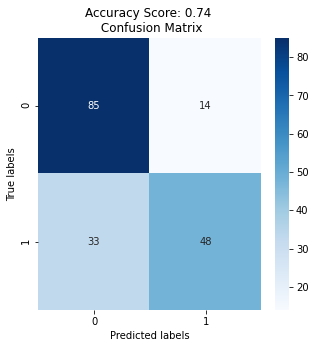

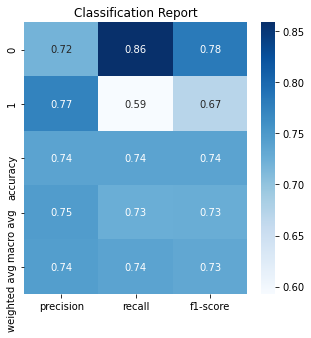

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_bow, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**3. LSTM**

In [ ]:
model = Sequential()
model.add(Embedding(500, 120, input_length = xtrain_bow.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())
batch_size=32
model.fit(xtrain_bow, ytrain, epochs = 10, batch_size=batch_size, verbose = 'auto')

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, 1000, 120)         60000     
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 1000, 120)         0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 176)               209088    
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 177       
Total params: 269,265
Trainable params: 269,265
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
model_default = build_model()
_activations=['tanh','relu','selu']
_optimizers=['sgd','adam']
_batch_size=[16,32,64]
params=dict(var_activation=_activations,
            var_optimizer=_optimizers,
            batch_size=_batch_size)
print(params)

model = KerasClassifier(build_fn=build_model,epochs=4,batch_size=16)
np.random.seed(42)
rscv = RandomizedSearchCV(model, param_distributions=params, cv=3, n_iter=7)
rscv_results = rscv.fit(xtrain_bow,ytrain)
print('Best score is: {} using {}'.format(rscv_results.best_score_,
rscv_results.best_params_))

#TF-IDF

**1. SVM-RBF**

**Hyper parameter tuning using grid Search**

In [ ]:
parameters = [{'C': [1,10,50,100], 'kernel': ['linear','rbf']}]
grid_search = GridSearchCV(estimator= svc,
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(xtrain_tfidf, ytrain)
grid_search.best_params_
prediction = grid_search.predict(xvalid_tfidf) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)


print("SVM_RBF(tfidf) after HT+GS, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.71      0.87      0.78        99
           1       0.78      0.57      0.66        81

    accuracy                           0.73       180
   macro avg       0.75      0.72      0.72       180
weighted avg       0.74      0.73      0.73       180

SVM_RBF(tfidf) after HT+GS, Accuracy Score: 0.7333333333333333


**Accuracy or Confusion Matrix**

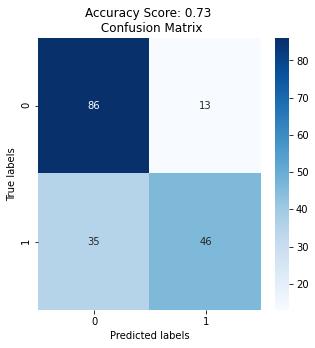

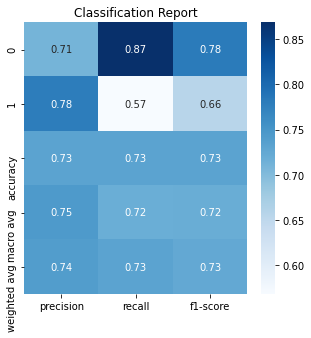

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_tfidf, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**Hyper Parameter tuning Using Random Grid**

In [ ]:
svc = svm.SVC()

# Create the random grid
random_grid = {'C': [1,10,100], 
              'kernel': ['linear','rbf']}
              
rf_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_tfidf, ytrain)
print(rf_random.best_params_)
prediction = rf_random.predict(xvalid_tfidf) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM(tfidf) after HT+RS, Accuracy Score:",acc1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'kernel': 'rbf', 'C': 10}
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        99
           1       0.76      0.59      0.67        81

    accuracy                           0.73       180
   macro avg       0.74      0.72      0.72       180
weighted avg       0.74      0.73      0.73       180

SVM(tfidf) after HT+RS, Accuracy Score: 0.7333333333333333


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.8s finished


**Accuracy and Confusion Matrix**

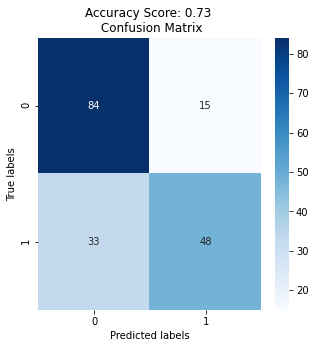

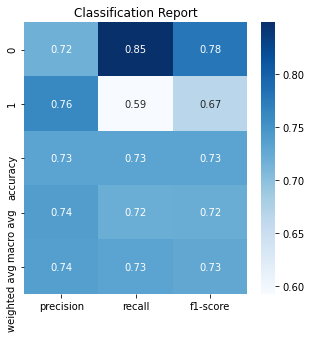

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_tfidf, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**2. Random Forest**

**Hyper Parameter Tuning using Grid Search**

In [ ]:
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 50, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(xtrain_tfidf, ytrain)
print(grid_search.best_params_)
prediction = grid_search.predict(xvalid_tfidf)

#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(tfidf) after HT+GD, Accuracy Score:",acc1)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.8min


{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.56      0.99      0.71        99
           1       0.75      0.04      0.07        81

    accuracy                           0.56       180
   macro avg       0.65      0.51      0.39       180
weighted avg       0.64      0.56      0.42       180

RF(tfidf) after HT+GD, Accuracy Score: 0.5611111111111111


[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.5min finished


**Accuracy and Confusion Matrix**

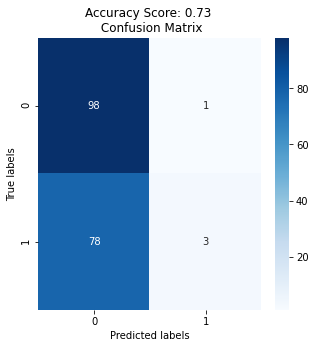

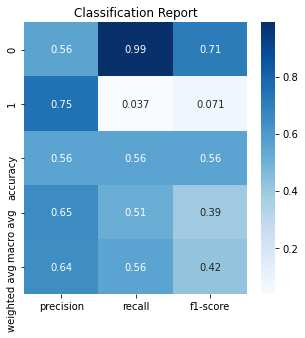

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_tfidf, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**Hyper Parameter Tuning using Random Search**

In [ ]:
rf = RandomForestClassifier()
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_tfidf, ytrain)

print("best Params")
print(rf_random.best_params_)

prediction = rf_random.predict(xvalid_tfidf)

#classifiction Report
report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(tfidf) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.0min finished


best Params
{'n_estimators': 979, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 45, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        99
           1       0.72      0.64      0.68        81

    accuracy                           0.73       180
   macro avg       0.73      0.72      0.72       180
weighted avg       0.73      0.73      0.73       180

RF(tfidf) after HT+RS, Accuracy Score: 0.7277777777777777


**Accuracy and Confusion Matrix**

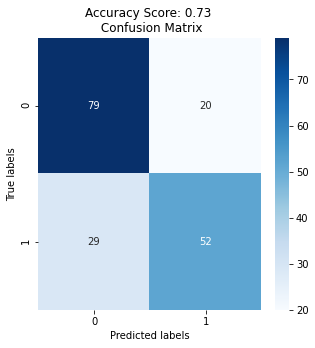

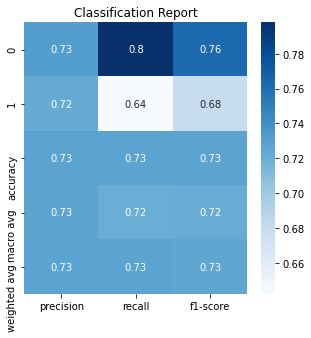

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_tfidf, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

**3. LSTM**

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
model = Sequential()
model.add(Embedding(500, 120, input_length = xtrain_tfidf.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())
batch_size=32
model.fit(xtrain_tfidf, ytrain, epochs = 10, batch_size=batch_size, verbose = 'auto')

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_44 (Embedding)     (None, 1000, 120)         60000     
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 1000, 120)         0         
_________________________________________________________________
lstm_44 (LSTM)               (None, 176)               209088    
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 177       
Total params: 269,265
Trainable params: 269,265
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
model_default = build_model()
_activations=['tanh','relu','selu']
_optimizers=['sgd','adam']
_batch_size=[16,32,64]
params=dict(var_activation=_activations,
            var_optimizer=_optimizers,
            batch_size=_batch_size)
print(params)

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=build_model,epochs=7,batch_size=16)
np.random.seed(42)
rscv = RandomizedSearchCV(model, param_distributions=params, cv=3, n_iter=6)
rscv_results = rscv.fit(xtrain_tfidf,ytrain)
print('Best score is: {} using {}'.format(rscv_results.best_score_,
rscv_results.best_params_))